## **CA03 Assignment**
By: *Kyle Rauscher*


#1. Data Sources and Content

In [92]:
#import necessary and used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [93]:
#read data from github link
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [94]:
# print the DataFrame's shape
print(df.shape)

(48842, 11)


In [95]:
# print the DataFrame's data types
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [96]:
#see examples of the first few rows
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**Q.1 Why does it makes sense to discretize columns for this problem?**

In this problem it makes sense to discretize columns because decision trees can first of all preform better with discrete values rather than continuous variables. Secondly, it helps in this case as it is easier to interpert results
when looking at relationships between features. For instance it is easier to look at bins of the data rather than the raw numbers when we are looking to build a decision tree.
________________________________________

**Q.2 What might be the issues (if any) if we DID NOT discretize the columns.**

If we used continuous features for the machine learning algorithm we might make the tree too complex. We could face some issues of overfitting if we tried to use raw data. One other possible issue that could arise is the missing of some relationships and patters. Some may not be as clear with raw numbers and relationships between features could not be found within the analysis.



#2. Data Quality Analysis (DQA)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [98]:
#find number of missing values
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [99]:
categorical_vars = df.select_dtypes(include=['object'])
# Create a data quality report for the categorical features
DataQualityReport = pd.DataFrame(categorical_vars.count(), columns=['count'])
DataQualityReport['cardinality'] = pd.DataFrame(categorical_vars.nunique())
DataQualityReport['% missing'] = categorical_vars.isna().sum()/len(df)*100
DataQualityReport['mode'] = categorical_vars.mode().iloc[0]
DataQualityReport['mode frequency'] = categorical_vars.apply(lambda x: x.value_counts().iloc[0])
DataQualityReport['mode %'] = (DataQualityReport['mode frequency'] / len(categorical_vars) *100).round(2)

print(DataQualityReport)

                    count  cardinality  % missing          mode  \
hours_per_week_bin  48842            5        0.0      b. 31-40   
occupation_bin      48842            5        0.0  c. Mid - Mid   
msr_bin             48842            3        0.0       c. High   
capital_gl_bin      48842            3        0.0        a. = 0   
race_sex_bin        48842            3        0.0       c. High   
education_num_bin   48842            5        0.0       b. 9-12   
education_bin       48842            5        0.0        b. Mid   
workclass_bin       48842            2        0.0     b. income   
age_bin             48842            5        0.0      e. 40-55   
flag                48842            2        0.0         train   

                    mode frequency  mode %  
hours_per_week_bin           26639   54.54  
occupation_bin               13971   28.60  
msr_bin                      22047   45.14  
capital_gl_bin               42525   87.07  
race_sex_bin                 29737   

In [100]:
df.describe(include = 'all')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


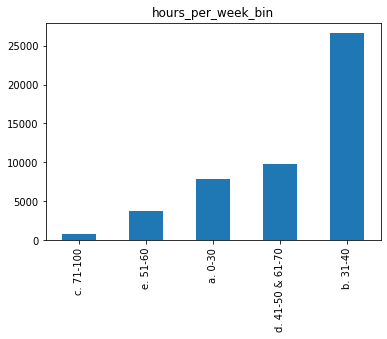

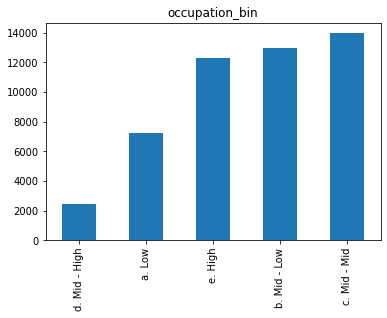

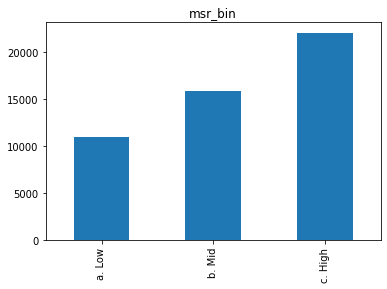

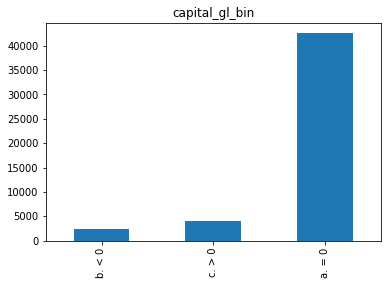

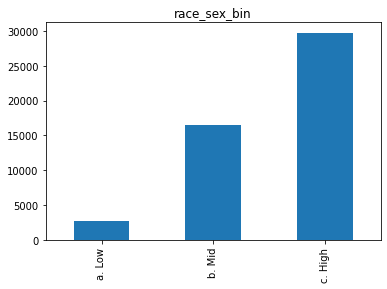

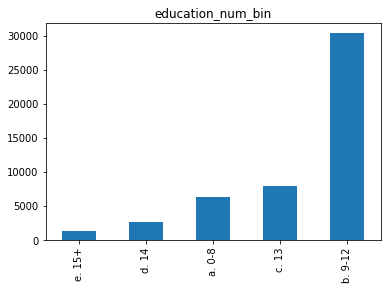

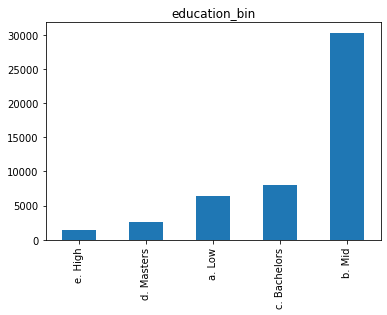

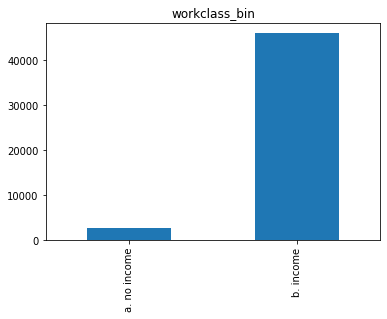

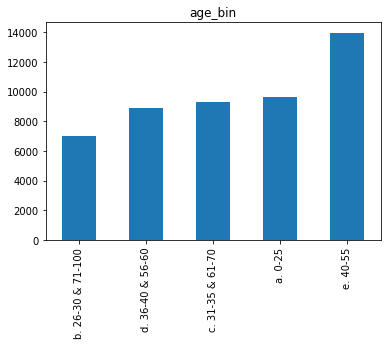

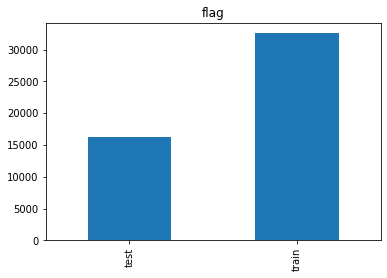

In [101]:
#using the dataframe from about with just categorical variables

for column in categorical_vars:
    plt.figure()
    categorical_vars[column].value_counts().sort_values().plot(kind='bar')
    plt.title(column)
    plt.show()

# 3. Build Decision Tree Classifier Models

In [102]:
#split the dataset into the training set and the test set
train_data=df[df['flag']=='train']
test_data=df[df['flag']=='test']
print(train_data.shape)
print(test_data.shape)

(32561, 11)
(16281, 11)


In [103]:
#encoding the x and y categorical varaibles into discrete values using hot encoding
x_train = pd.get_dummies(train_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin']])
x_test = pd.get_dummies(test_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin']])
y_train=train_data['y']
y_test=test_data['y']

In [104]:
#Building the first original base Decision Tree Model using the Classifer from SciKit Learn package
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features = None, min_samples_leaf=15)

dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

#4 Evaluate Decision Tree Performance

[[11538   897]
 [ 1656  2190]]


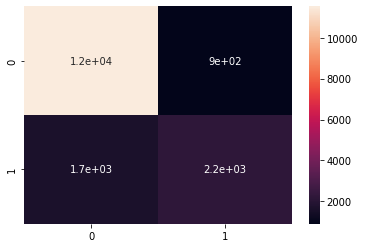

In [105]:
#To Evalauate our model we can first look at a confusion Matrix to compare the True Positves, False Positives, False Negatives and True Negatives
print(metrics.confusion_matrix(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [106]:
#Next to Evaluate the model we can look at Accuracy, Precision, Recall F1 Score of our model
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



#5 Tune Decision Tree Performance

**Q3 Decision Tree Hyper-parameter variation vs performance**


In [107]:
#Looking to find the best hyperparameters for our model
#Looking at the four hyperparameters of Split Criteria, Max Features, Min Sample Leaf, Max Depth

#Run 1 for Split Criteria
results_df = pd.DataFrame(columns=['criterion', 'accuracy', 'recall', 'precision', 'f1_score'])
criterion_options = ['entropy', 'gini']
for criterion in criterion_options:
    model = DecisionTreeClassifier(criterion=criterion, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']
    results_df = results_df.append({'criterion': criterion, 
                                    'accuracy': accuracy, 
                                    'recall': recall, 
                                    'precision': precision, 
                                    'f1_score': f1_score}, 
                                   ignore_index=True)
print(results_df)

  criterion  accuracy    recall  precision  f1_score
0   entropy  0.835575  0.835575   0.827275  0.829170
1      gini  0.836435  0.836435   0.828037  0.829804


In [108]:
#As the Gini is slightly higher we use that for our next run
#Run 2 Looking for Min Sample Leaf
results_df = pd.DataFrame(columns=['min leaf samples', 'accuracy', 'recall', 'precision', 'f1_score'])
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
for leaf_samples in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=leaf_samples, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']
    results_df = results_df.append({'min leaf samples': leaf_samples, 
                                    'accuracy': accuracy, 
                                    'recall': recall, 
                                    'precision': precision, 
                                    'f1_score': f1_score}, 
                                   ignore_index=True)
print(results_df)

   min leaf samples  accuracy    recall  precision  f1_score
0               5.0  0.838831  0.838831   0.830594  0.832187
1              10.0  0.839998  0.839998   0.831929  0.833491
2              15.0  0.841963  0.841963   0.833877  0.835165
3              20.0  0.844051  0.844051   0.836208  0.837401
4              25.0  0.843314  0.843314   0.835489  0.836808
5              30.0  0.842332  0.842332   0.834136  0.835253
6              35.0  0.843069  0.843069   0.834990  0.836102
7              40.0  0.842454  0.842454   0.834254  0.835341


In [109]:
#From the code above we can see that 20 min leaf samples provides us with the highest accuracy
#Run 3 Looking for Max Features
results_df = pd.DataFrame(columns=['max features', 'accuracy', 'recall', 'precision', 'f1_score'])
max_features_options = ['auto', None, .3, .4, .5, .6, .7, .8]
for max_samples in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_features=max_samples,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']
    results_df = results_df.append({'max features': max_samples, 
                                    'accuracy': accuracy, 
                                    'recall': recall, 
                                    'precision': precision, 
                                    'f1_score': f1_score}, 
                                   ignore_index=True)
print(results_df)

  max features  accuracy    recall  precision  f1_score
0         auto  0.832197  0.832197   0.822902  0.824653
1          NaN  0.844051  0.844051   0.836208  0.837401
2          0.3  0.843929  0.843929   0.835697  0.836404
3          0.4  0.840550  0.840550   0.832552  0.834096
4          0.5  0.843191  0.843191   0.835746  0.837329
5          0.6  0.840059  0.840059   0.832125  0.833760
6          0.7  0.843437  0.843437   0.835249  0.836150
7          0.8  0.843744  0.843744   0.835688  0.836699


In [110]:
#From the code above we can see that None Max samples provides us with the highest accuracy
#Run 4 Looking for Max Depth
results_df = pd.DataFrame(columns=['max depth', 'accuracy', 'recall', 'precision', 'f1_score'])
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for depth_samples in max_depth_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_features=None,max_depth=depth_samples,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']
    results_df = results_df.append({'max depth': depth_samples, 
                                    'accuracy': accuracy, 
                                    'recall': recall, 
                                    'precision': precision, 
                                    'f1_score': f1_score}, 
                                   ignore_index=True)
print(results_df)

   max depth  accuracy    recall  precision  f1_score
0        2.0  0.816596  0.816596   0.802435  0.797323
1        4.0  0.827590  0.827590   0.815890  0.814117
2        6.0  0.840550  0.840550   0.833754  0.835702
3        8.0  0.843314  0.843314   0.835088  0.835961
4       10.0  0.845955  0.845955   0.838405  0.839587
5       12.0  0.844420  0.844420   0.837058  0.838566
6       14.0  0.843744  0.843744   0.836009  0.837342
7       16.0  0.844051  0.844051   0.836208  0.837401
8       18.0  0.844051  0.844051   0.836208  0.837401
9       20.0  0.844051  0.844051   0.836208  0.837401


In [111]:
#From the above we can see the highest accuracy for the correct depth would be 10
#We can now plug this back all of our features back into the model

dtree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, 
                               max_features=None,max_depth=10,random_state=101)

dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

#6 Visualize Your Best Decision Tree using Graphviz

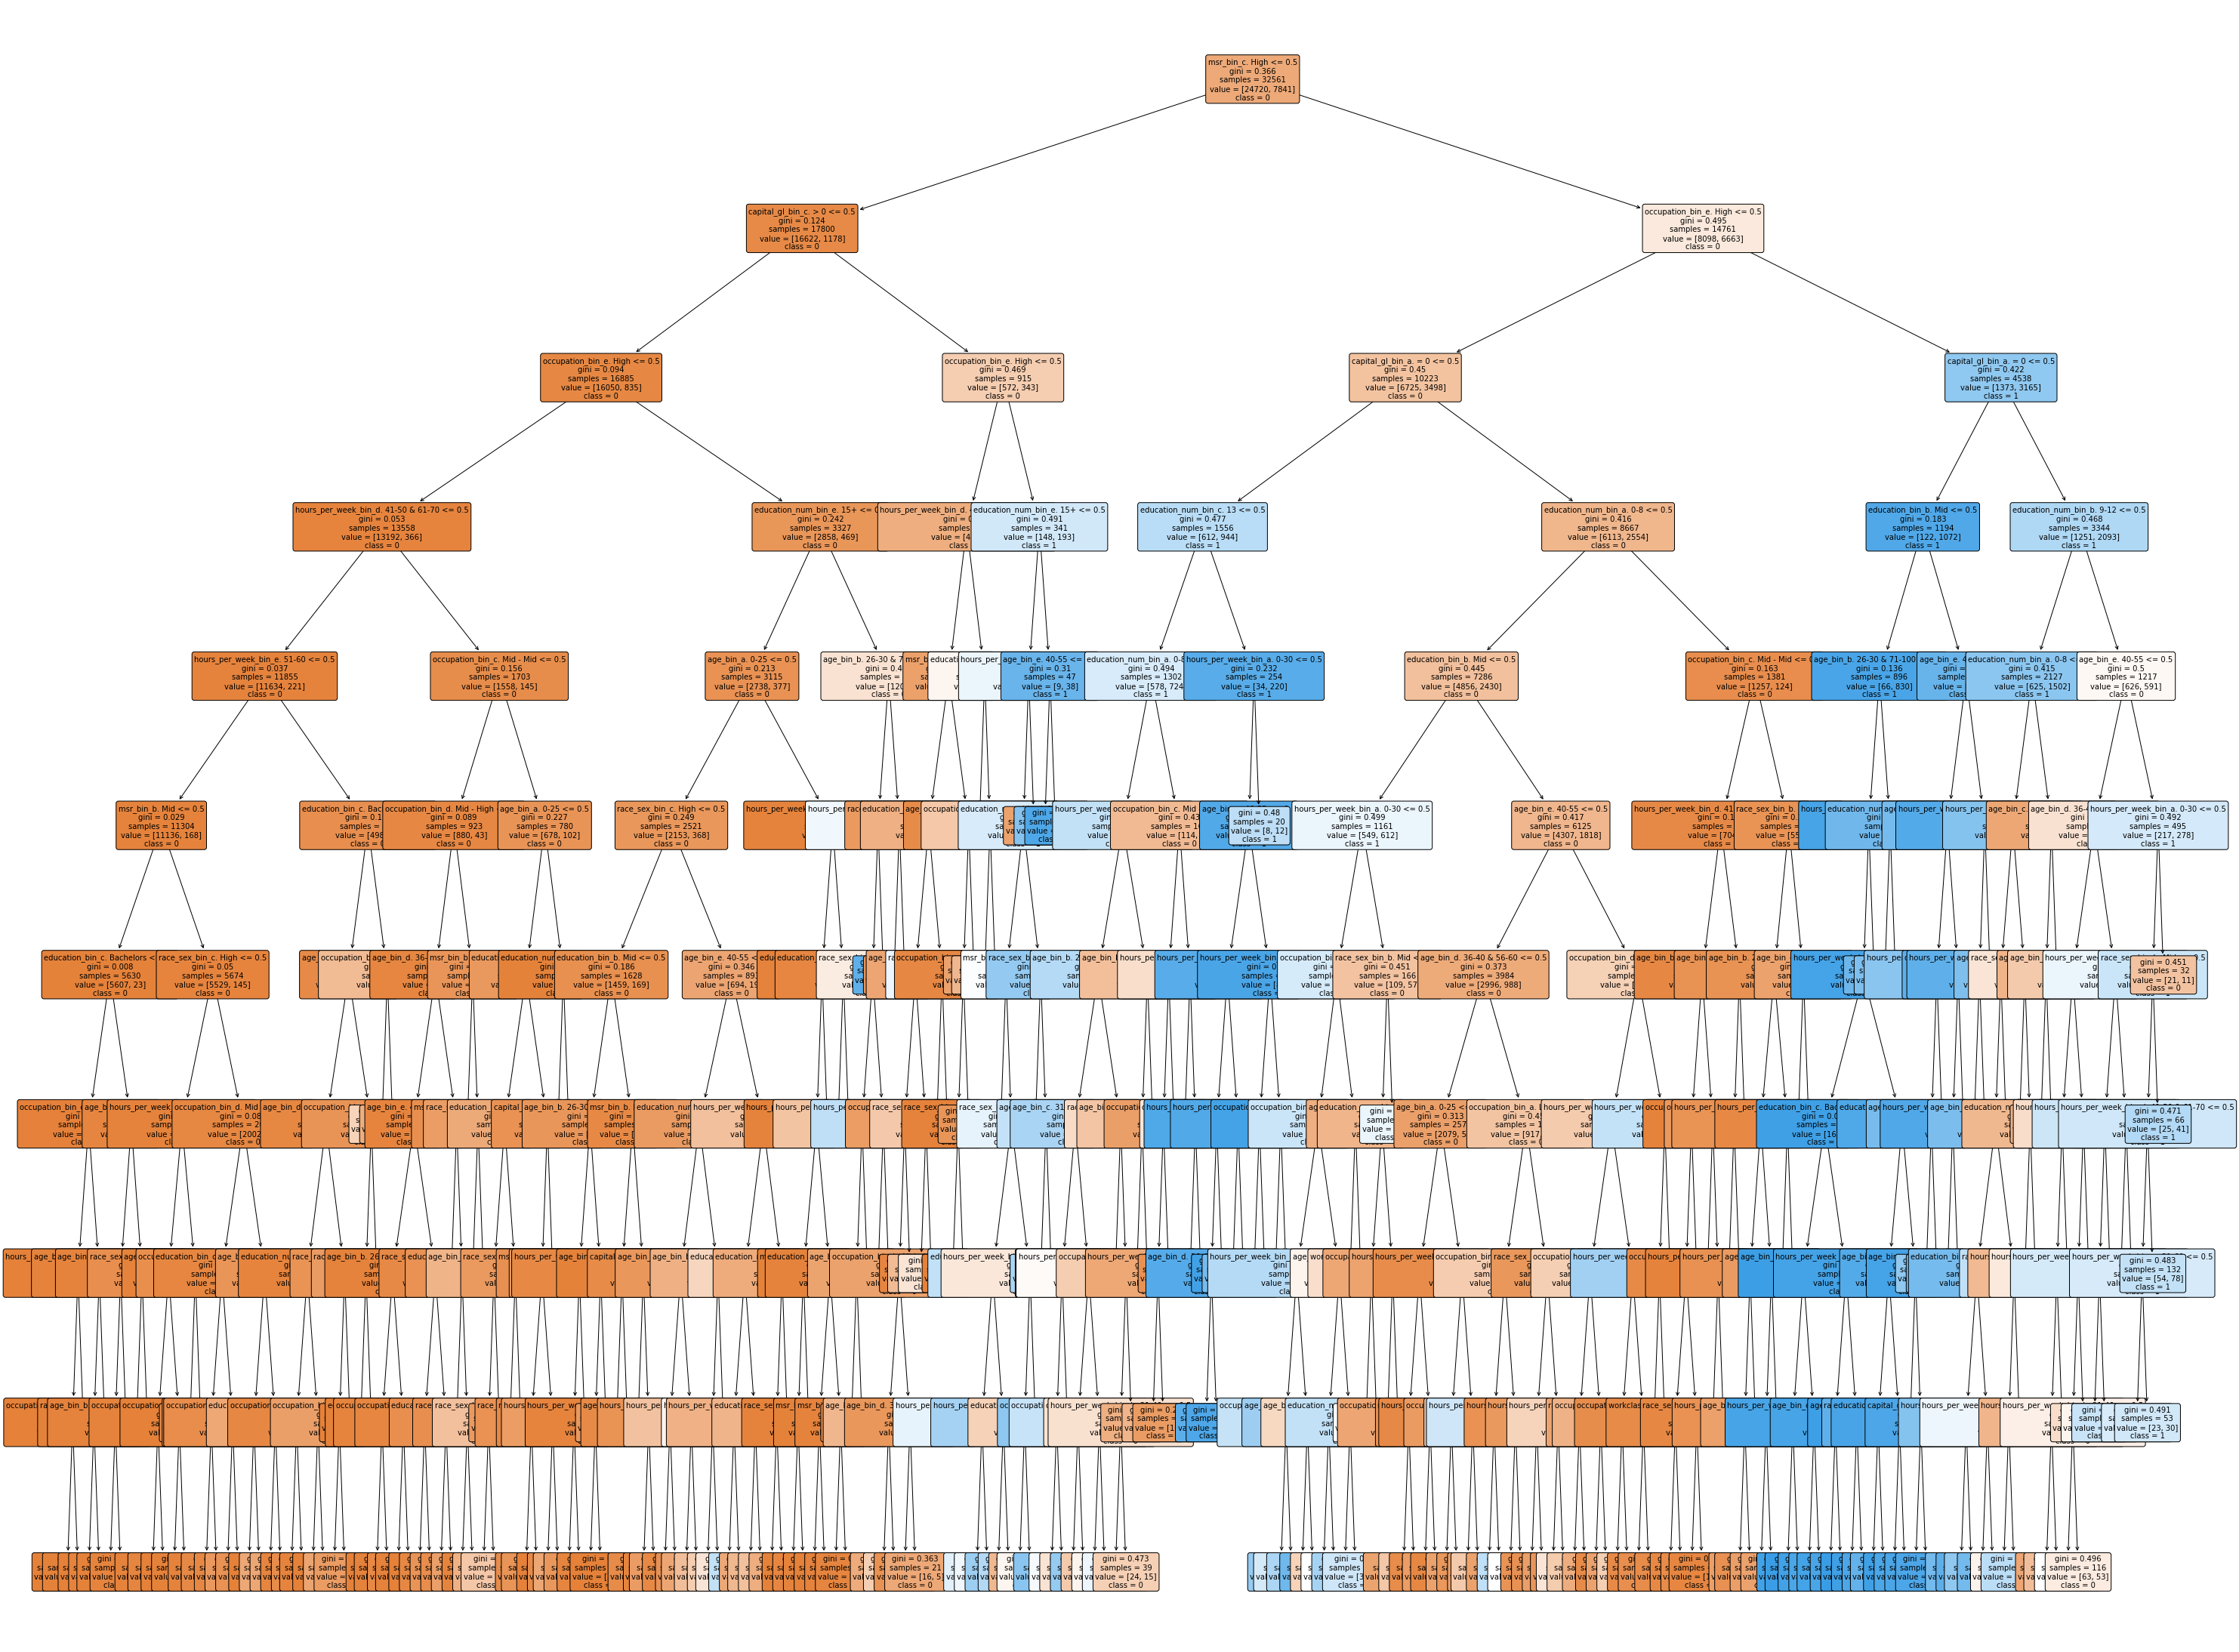

In [112]:
#We can now use the Graphviz Function to visualize our best model Decision Tree
plt.figure(figsize=(50,40))
a = plot_tree(dtree, feature_names=list(x_train), class_names=['0', '1'], 
              filled=True, rounded=True, fontsize=10)
plt.show()

#7 Conclusion

**Q4 How long was your total run time to train the best model?**

Total Run Time Train the Best Model was 143 ms for our model

In [113]:
#find how long our model took to run
%%time

best_dtree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, 
                               max_features=None,max_depth=10,random_state=101)

best_dtree.fit(x_train, y_train)
y_pred=best_dtree.predict(x_test)

CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 138 ms


**Q5 Did you find the BEST TREE?**

After going through each of the hyperparameters, we were able to find the best tree. It is the best tree based on the given test data set. We were able to first start with a model and then tune it based on the best parameters. Looking at the report of recall, accuracy, and precision, it is the best tree.
________

**Q6 Write your observations from the visualization of the best tree**

Looking at the obeservations in the vizualization of the best tree we can conclude, the first branch starts at msr_bin High. From there is breaks down into capital gl and occupation high.

________
**Q7 Will this Tree “overfit”?**

This tree has some issues being overfit for our model as it is so specific to our training dataset. This is an issue that our model that it has an accuracy that is probably too high when compared to other data out there. Further pruning and testing should be performed on the data.

#8 Prediction Using Your "trained" Decision Tree Model

*Using the best trained model make a prediction for an individual based on these characteristics*

• Hours Worked per Week = 48

• Occupation Category = Mid - Low

• Marriage Status & Relationships = High

• Capital Gain = Yes

• Race-Sex Group = Mid

• Number of Years of Education = 12

• Education Category = High

• Work Class = Income

• Age = 58

In [114]:
#creating a dataframe with the input values of our new customer we want to predict
#use the features of the individuals compared against the trainging set

pred_df =pd.DataFrame({'hours_per_week_bin_a. 0-30':0, 'hours_per_week_bin_b. 31-40':0,
  'hours_per_week_bin_c. 71-100':0, 'hours_per_week_bin_d. 41-50 & 61-70':1,
  'hours_per_week_bin_e. 51-60':0, 'occupation_bin_a. Low':0,
  'occupation_bin_b. Mid - Low':1,	'occupation_bin_c. Mid - Mid':0,
  'occupation_bin_d. Mid - High':0, 'occupation_bin_e. High':0,
  'capital_gl_bin_a. = 0': 0, 'capital_gl_bin_b. < 0': 0, 
  'capital_gl_bin_c. > 0': 1, 'race_sex_bin_a. Low': 0,'race_sex_bin_b. Mid': 1, 
  'race_sex_bin_c. High': 0,'msr_bin_a. Low': 0,'msr_bin_b. Mid': 0, 
  'msr_bin_c. High': 1, 'education_num_bin_a. 0-8': 0, 
  'education_num_bin_b. 9-12': 1, 'education_num_bin_c. 13': 0, 
  'education_num_bin_d. 14': 0, 'education_num_bin_e. 15+': 0,
  'education_bin_a. Low': 0, 'education_bin_b. Mid': 0, 
  'education_bin_c. Bachelors':0,	'education_bin_d. Masters':0,	
  'education_bin_e. High':1,	'workclass_bin_a. no income':0,	
  'workclass_bin_b. income':1,	'age_bin_a. 0-25':0,	
  'age_bin_b. 26-30 & 71-100':0,	'age_bin_c. 31-35 & 61-70':0,
  'age_bin_d. 36-40 & 56-60':1,	'age_bin_e. 40-55':0}, index=[0])

pred_df

,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [115]:
#Using the Best Model on our prediction data entry
dtree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, 
                               max_features=None,max_depth=10,random_state=101)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(pred_df)

#Determining if the prediction is for less than or greater than 50k
if y_pred == 0:
  print('Income Prediction: Less than or equal to 50k')
else:
  print('Income prediction: Greater than or equal to 50 k')

Income prediction: Greater than or equal to 50 k


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [116]:
#finding the probability of our model being correct
x_prob=[[0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0]]
y_pred=dtree.predict(x_prob)
prob=dtree.predict_proba(x_prob)
print('The Confidence of the prediciton is ',prob[0][y_pred])

The Confidence of the prediciton is  [0.71141975]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Q8 What is the probability that your prediction for this person is correct?**

There is a 71.1% probability that the prediction is correct that the person will have an income greater than or equal to $50k.